# Tutorial 1.1 
## How to use RGB Seleting Function with 2MASS/Gaia DR2 Data
Author: Anastasios (Andy) Tzanidakis

Contact: at3156@columbia.edu

In [2]:
import matplotlib.pyplot as plt
from astropy.io import ascii
%matplotlib inline

In [3]:
# RGB Star Selecting function 
from RGB_pipeline import rgb

In [5]:
# datapath
data_path = '/Users/iraf1/Downloads/gaia_sample.csv'
# Load data 
data_test = ascii.read(data_path)

In [6]:
# View the raw astropy table that we have just loaded
data_test

source_id,ra,dec,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,tmass_oid,j_m,h_m,ks_m,j_msigcom,h_msigcom,ks_msigcom
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64
853471849244539904,158.19907235069073,54.84611909722335,0.6457061678972248,0.15079647385304354,-2.164834224465418,0.16779183929771824,-8.666922242759286,0.2822771912800557,17.48115,17.740953,16.991072,440163302,16.585,16.19,15.522,0.145,0.2,--
853541947406479744,158.26593562467318,55.35971573170396,0.8146031077626624,0.07291789071204319,-8.058321254772189,0.08080534331873265,0.2477227441667279,0.1352096814770408,16.38071,16.808348,15.801461,441313579,15.09,14.801,14.546,0.046,0.058,0.075
853566647762900352,158.43060834241976,55.647909847992636,1.8725893984486295,0.36204069628912605,-4.972752713956261,0.4464772011362445,-31.69793635227694,0.6274979504013742,19.094976,20.486397,17.861855,441960427,16.234,15.728,15.67,0.1,0.164,0.192
853589123327286272,159.55551789133142,55.58991079515646,2.7321735880381386,0.20895723752722098,-12.287669662364761,0.2127164873187866,-33.73692276393092,0.29104727920765106,18.073748,19.507917,16.916769,441830305,15.306,14.77,14.611,0.056,0.073,0.098
853481126374002944,158.61085809286595,55.08783041870703,3.6372184229297666,0.46143093665801677,8.103911952123438,0.4772381530099785,3.553099868563862,0.7972607816303592,19.265581,20.877083,17.943897,440705516,16.086,15.335,15.102,0.086,0.104,0.109
853458659400731264,157.77886322969965,54.75301079799344,1.3162084441101964,0.0658115814422006,9.059418922794379,0.08051547904775,-16.141389245067316,0.09522082384157327,16.409018,17.204247,15.535791,439953024,14.43,13.764,13.657,0.032,0.041,0.041
853626850320016256,159.55500419216088,55.764375753596376,0.6931753089106711,0.2580970947290171,-0.6295338523941485,0.30481415725449595,-26.35999611041969,0.39772913305192864,18.756765,19.583235,17.758757,442220495,16.434,15.973,15.338,0.137,0.193,--
853471505647405312,158.44093315583854,54.95830945870454,5.030747353760412,0.5999452993004718,10.517118282489674,0.5960417738621454,-34.850525555526815,0.9135548931205779,19.564766,21.225815,18.175722,440415576,16.178,15.655,15.074,0.099,0.141,0.118
853627056478446336,159.56458073503262,55.7785082409671,1.150282009114555,0.35608753277253186,-27.973667414840236,0.4495735889757932,-18.484752044598814,0.5267467236656682,19.251736,20.575783,17.987505,442251943,16.429,15.411,15.708,0.13,0.122,0.252


We first view the Color-Magnitude Diagram (CMD)

Text(0,0.5,'$k_s$')

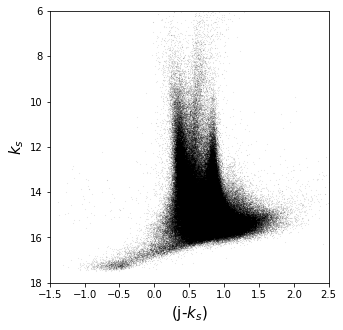

In [7]:
_, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))

ax.scatter((data_test['j_m']-data_test['ks_m']),data_test['ks_m'], s=0.001, color='k')
ax.set_ylim(ax.set_ylim(6,18)[::-1])
ax.set_xlim(-1.5, 2.5)
ax.set_xlabel('(j-$k_s$)', size=15)
ax.set_ylabel('$k_s$', size=15)


In [8]:
# Begin selection and correction process: 
rgb_stars = rgb(data_test) # create rgb_star object
corr_stars = rgb_stars.dust_correction(r_ks=0.306, r_j=0.72, r_h=0.46) # correct for exctinction for 2MASS colors
rgb_sample = rgb_stars.rgb_select(corr_stars,JKs0=0.85, up_ks0=9.5, down_ks0=12.5)  # Select RGB stars

/Users/iraf1/anaconda/envs/py36/lib/python3.6/site-packages/astropy/coordinates/baseframe.py:128: AstropyDeprecationWarning: The `representation` keyword/property name is deprecated in favor of `representation_type`
  'favor of `representation_type`', AstropyDeprecationWarning)



Text(0,0.5,'$k_s$')

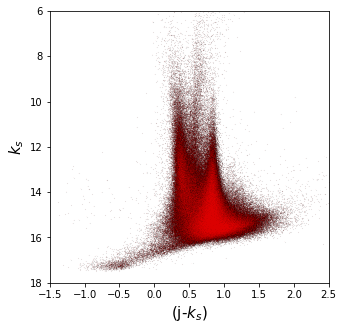

In [46]:
_, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))

ax.scatter((data_test['j_m']-data_test['ks_m']),data_test['ks_m'], s=0.001, color='k')
ax.scatter((corr_stars['j0']-corr_stars['ks0']), corr_stars['ks0'], s=0.001, color='red', alpha=0.3)

ax.set_ylim(ax.set_ylim(6,18)[::-1])
ax.set_xlim(-1.5, 2.5)
ax.set_xlabel('(j-$k_s$)', size=15)
ax.set_ylabel('$k_s$', size=15)

In [ ]:
jk = (data_test['j_m']-data_test['ks_m'])
jk0 = (corr_stars['j0']-corr_stars['ks0'])

dl = jk0-jk

In [ ]:
plt.plot(jk0-jk)

Text(0,0.5,'$k_s$')

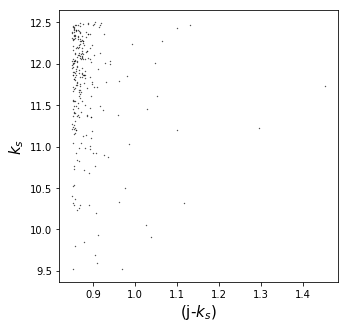

In [41]:
_, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))

ax.scatter((rgb_sample['j0']-rgb_sample['ks0']), rgb_sample['ks0'], s=0.1, color='k')
#ax.set_ylim(ax.set_ylim(6,18)[::-1])
ax.set_xlabel('(j-$k_s$)', size=15)
ax.set_ylabel('$k_s$', size=15)

In [38]:
corrected =rb_test.dust_correction(r_ks=0.306, r_j=0.72, r_h=0.46)

/Users/iraf1/anaconda/envs/py36/lib/python3.6/site-packages/astropy/coordinates/baseframe.py:128: AstropyDeprecationWarning: The `representation` keyword/property name is deprecated in favor of `representation_type`
  'favor of `representation_type`', AstropyDeprecationWarning)

